In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt

In [2]:
ea = event_accumulator.EventAccumulator('results/runs/Nov28_00-33-00_GPU-server')

In [3]:
ea.Reload()

In [4]:
ea.Tags()

{'images': [],
 'audio': [],
 'histograms': [],
 'scalars': ['training/loss',
  'training/grad_norm',
  'training/learning_rate',
  'other/epoch',
  'evaluation/bleu_1',
  'evaluation/bleu_2',
  'evaluation/bleu_3',
  'evaluation/bleu_4',
  'evaluation/eval_loss',
  'other/train_runtime',
  'other/train_samples_per_second',
  'other/train_steps_per_second',
  'other/total_flos',
  'other/train_loss',
  'train/loss',
  'train/grad_norm',
  'train/learning_rate',
  'train/epoch',
  'train/train_runtime',
  'train/train_samples_per_second',
  'train/train_steps_per_second',
  'train/total_flos',
  'train/train_loss'],
 'distributions': [],
 'tensors': ['args/text_summary', 'model_config/text_summary'],
 'graph': False,
 'meta_graph': False,
 'run_metadata': []}

In [5]:
training_loss = []
for scalar in ea.Scalars('train/loss'):
    training_loss.append((scalar.step, scalar.value))

eval_loss = []
for scalar in ea.Scalars('evaluation/eval_loss'):
    eval_loss.append((scalar.step, scalar.value))

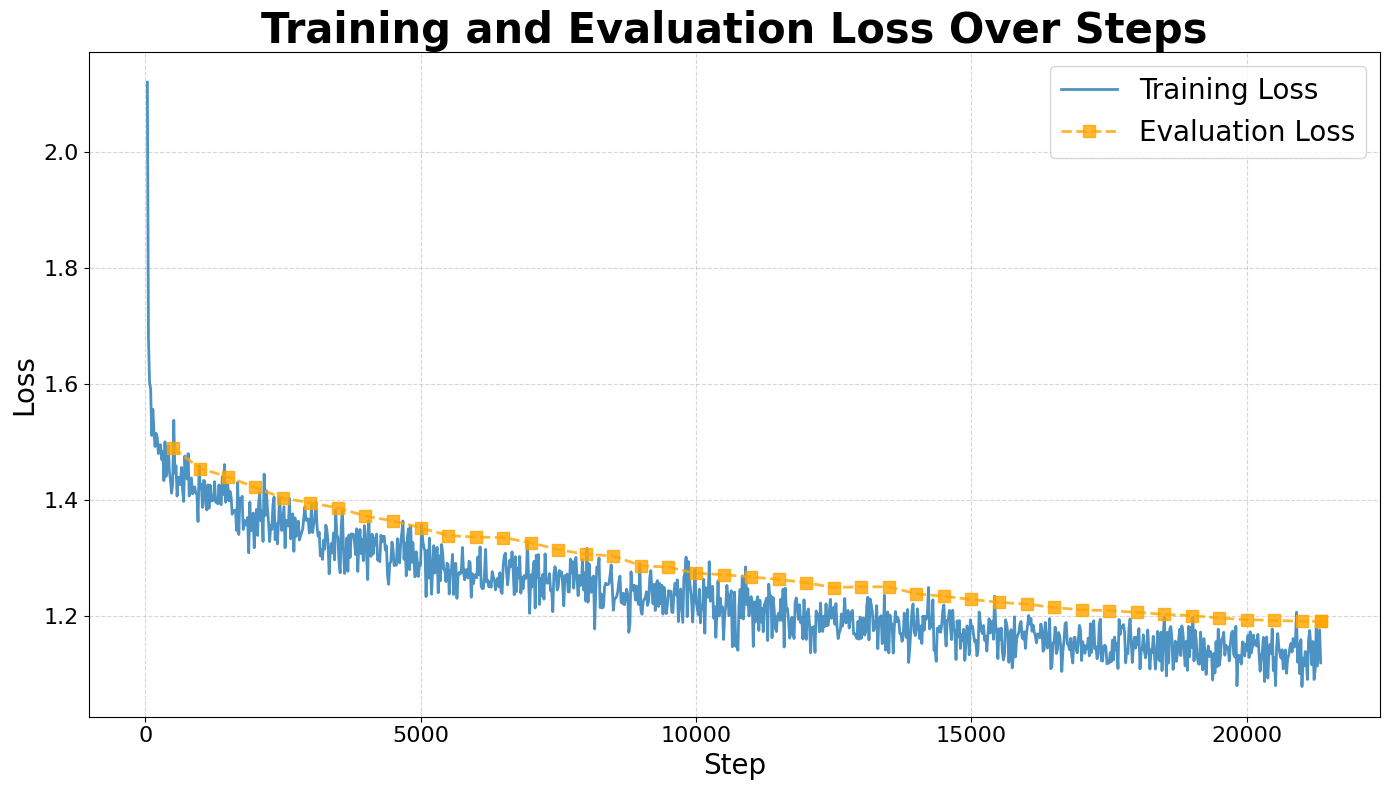

In [6]:
train_steps, train_values = zip(*training_loss[1:])
eval_steps, eval_values = zip(*eval_loss)
# Create the plot
plt.figure(figsize=(14, 8))

# Plot the training loss with a solid line and larger markers
plt.plot(train_steps, train_values, label='Training Loss', linestyle='-', markersize=8, alpha=0.8, linewidth=2)

# Plot the evaluation loss with a dashed line and larger markers
plt.plot(eval_steps, eval_values, label='Evaluation Loss', linestyle='--', marker='s', markersize=8, alpha=0.8, linewidth=2, color='orange')

# Customize labels, title, and legend
plt.xlabel('Step', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.title('Training and Evaluation Loss Over Steps', fontsize=30, fontweight='bold')
plt.legend(fontsize=20)

# Customize the grid for better clarity
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Make tick labels bigger for better readability
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
bleu_1 = []
for scalar in ea.Scalars('evaluation/bleu_1'):
    bleu_1.append((scalar.step, scalar.value))

bleu_2 = []
for scalar in ea.Scalars('evaluation/bleu_2'):
    bleu_2.append((scalar.step, scalar.value))

bleu_3 = []
for scalar in ea.Scalars('evaluation/bleu_3'):
    bleu_3.append((scalar.step, scalar.value))

bleu_4 = []
for scalar in ea.Scalars('evaluation/bleu_4'):
    bleu_4.append((scalar.step, scalar.value))

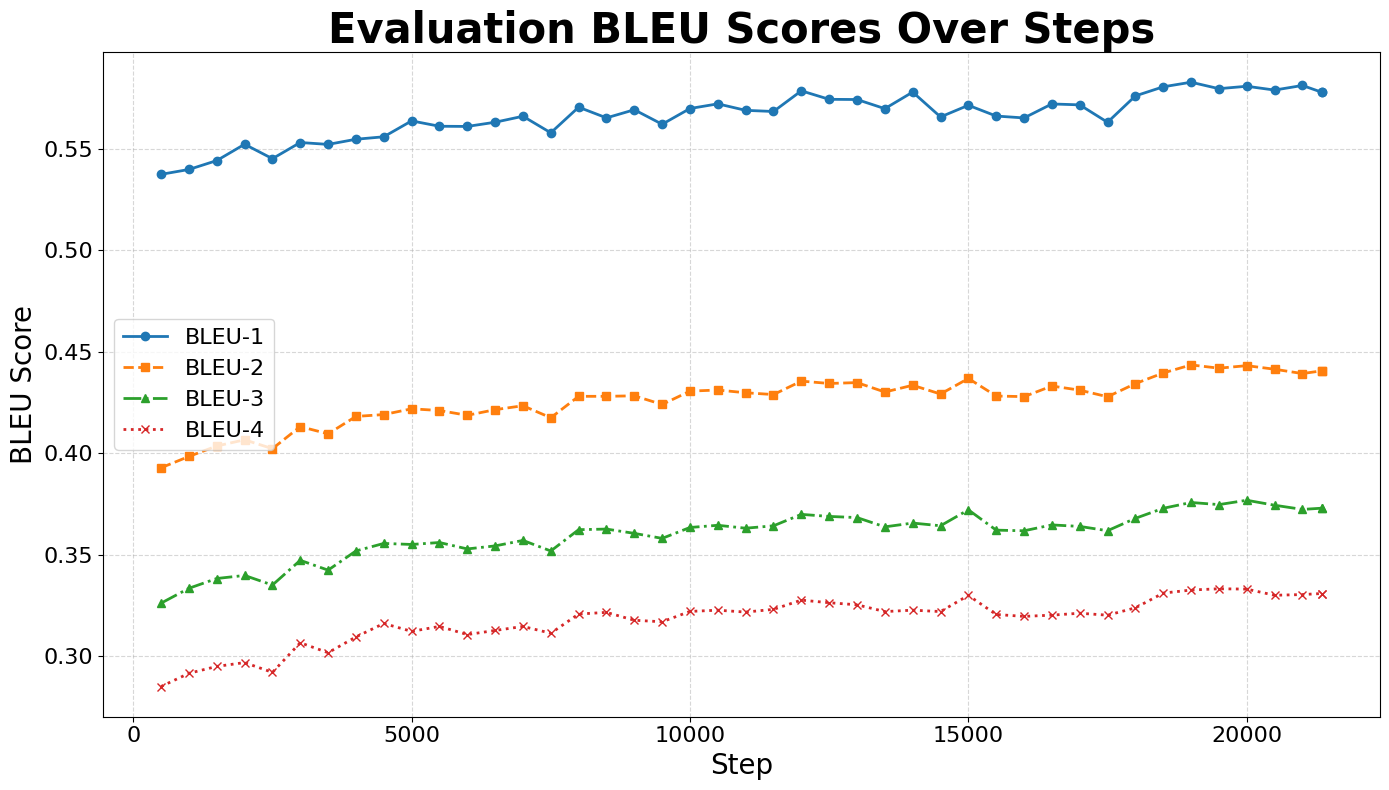

In [8]:
steps_1, values_1 = zip(*bleu_1)
steps_2, values_2 = zip(*bleu_2)
steps_3, values_3 = zip(*bleu_3)
steps_4, values_4 = zip(*bleu_4)

# Create the plot
plt.figure(figsize=(14, 8))
plt.plot(steps_1, values_1, label='BLEU-1', linestyle='-', marker='o', markersize=6, linewidth=2)
plt.plot(steps_2, values_2, label='BLEU-2', linestyle='--', marker='s', markersize=6, linewidth=2)
plt.plot(steps_3, values_3, label='BLEU-3', linestyle='-.', marker='^', markersize=6, linewidth=2)
plt.plot(steps_4, values_4, label='BLEU-4', linestyle=':', marker='x', markersize=6, linewidth=2)

# Customize the plot for better readability
plt.xlabel('Step', fontsize=20)
plt.ylabel('BLEU Score', fontsize=20)
plt.title('Evaluation BLEU Scores Over Steps', fontsize=30, fontweight='bold')
plt.legend(fontsize=16)
plt.grid(visible=True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()

# Display the plot
plt.show()